# Homework 5
## Carlos Olivas ID# 861045506


For this assignment, we are meant to examine adult census data to predict whether yearly income will exceed $50k. The majority of the attributes of the data are categorical, so there were need to be an extra step to convert these features into numberical attributes. We will be using random forest and SVM as the predictive models.

First, we must import the necessary libraries. 

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, ADASYN
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Next we will read in the data, and seperate the features from the labels for the data.

In [58]:
train_data = pd.read_csv("adult.data", header=None, delimiter=r",\s+",)
test_data = pd.read_csv("adult.test", header=None, delimiter=r",\s+", skiprows=1)

# attribute names for the data
attrs = ['age', 'work_class', 'final_weight', 'education', 'education_num', 'martial_status', 'occupation',
         'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

train_data.columns = attrs
test_data.columns = attrs

# separate the data
train_x = train_data.drop('income', axis=1)
train_y = train_data['income']

test_x = test_data.drop('income', axis=1)
test_y = test_data['income']

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


As was mentioned, we will need to convert the categorical data into real valued numbers. 

In [59]:
train_y = train_y.map({'<=50K': 0, '>50K': 1})
test_y = test_y.map({'<=50K.': 0, '>50K.': 1})

How about we get a visual of how the data is split in the training and testing data.

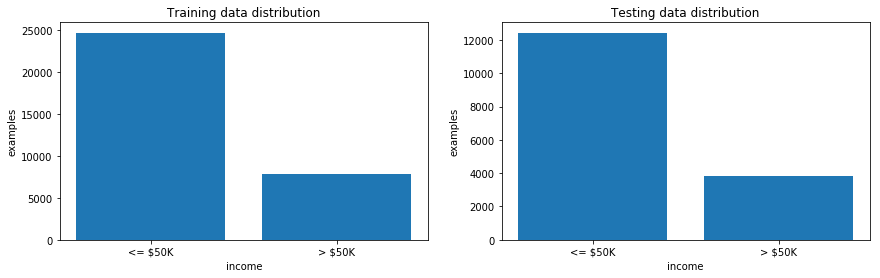

In [13]:
plt.figure()

plt.subplot(121)
plt.bar(["<= $50K", "> $50K"], train_y.value_counts())
plt.title('Training data distribution')
plt.ylabel('examples')
plt.xlabel('income')
plt.subplot(122)
plt.bar(["<= $50K", "> $50K"], test_y.value_counts())
plt.title('Testing data distribution')
plt.ylabel('examples')
plt.xlabel('income')
plt.subplots_adjust(right=2)
plt.show()

It's evident from the graphs that there is a greater number of examples for incomes at less than or equal to \$50k/year than incomes of greater than $50K/year. This is a point that could be considered when trying to improve the predictions.


In order to use the dataset features, we'll have to convert the categorical data into numerical data. We will do this first by using LabelEncoder. And then we will use the StandardScalar from scikit-learn to scale our features. 

In [48]:
# dropping education column as it is numerically represented in education_num column
train_x = train_x.drop('education', axis=1)
test_x = test_x.drop('education', axis=1)

l_enc = LabelEncoder()

train_x = train_x.apply(l_enc.fit_transform)
test_x = test_x.apply(l_enc.fit_transform)

sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

Now we'll apply create the Random Forest model and see how well it can predict.

In [39]:
rf_clf = RandomForestClassifier(n_estimators=1000)
rf_clf.fit(train_x, train_y)
test_predict = rf_clf.predict(test_x)
print(confusion_matrix(test_y, test_predict))
print('Prediction accuracy: %f' % accuracy_score(test_y, test_predict))

[[11676   759]
 [ 1641  2205]]
Prediction accuracy: 0.852589


We see that the random forest has produces a prediction accuracy of about 85.26%. Now, we'll apply the SVM model and see how it performs.

In [40]:
svm_clf = SVC()
svm_clf.fit(train_x, train_y)
test_predict = svm_clf.predict(test_x)
print(confusion_matrix(test_y, test_predict))
print('Prediction accuracy: %f' % accuracy_score(test_y, test_predict))

[[11875   560]
 [ 1830  2016]]
Prediction accuracy: 0.853203


The SVM produced a 85.32% prediction accuracy. While these numbers may seem promising, perhaps they can be improved. One attempt can be through feature selection. Our first attempt at feature selection will be through observation of a heatmap of the correlations of the features to income. 


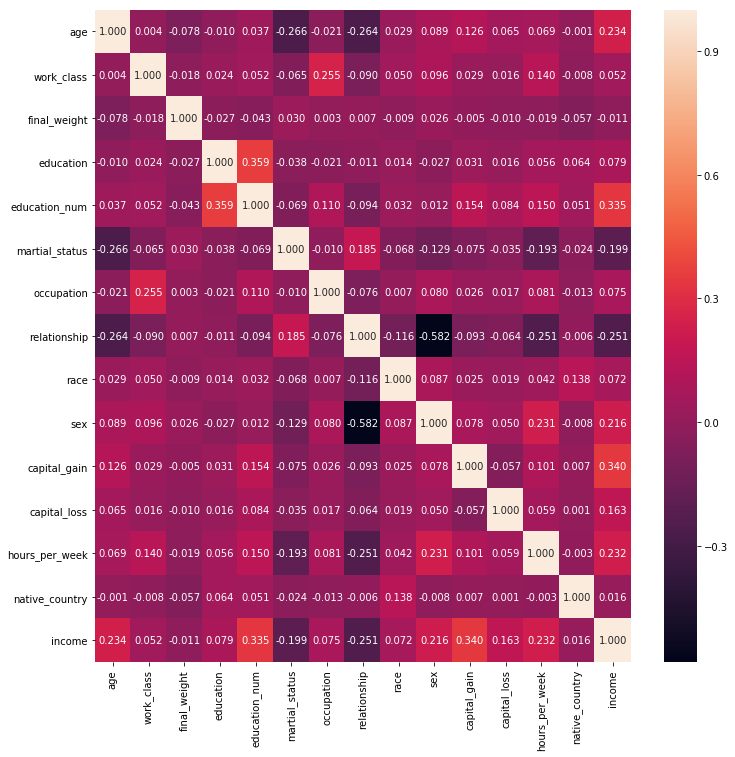

In [25]:
train_data_le = train_data.apply(l_enc.fit_transform)
plt.figure(figsize=(12, 12))
sns.heatmap(train_data_le.corr(), annot=True, annot_kws={"size": 10}, fmt='.3f', linewidths=0)
plt.show()

From the last row of the heatmap, we see that the final_weight an native_country features have the lowest correlation to income. We will drop those features and see if that helps.

In [62]:
train_x_fs = train_data.drop(['income', 'education','final_weight', 'native_country'], axis=1)
test_x_fs = test_data.drop(['income', 'education','final_weight', 'native_country'], axis=1)

train_x_fs = train_x_fs.apply(l_enc.fit_transform)
test_x_fs = test_x_fs.apply(l_enc.fit_transform)

train_x_fs = sc.fit_transform(train_x_fs)
test_x_fs = sc.transform(test_x_fs)


In [63]:
rf_clf = RandomForestClassifier(n_estimators=1000)
rf_clf.fit(train_x_fs, train_y)
test_predict = rf_clf.predict(test_x_fs)
print(confusion_matrix(test_y, test_predict))
print('Prediction accuracy: %f' % accuracy_score(test_y, test_predict))

[[11468   967]
 [ 1573  2273]]
Prediction accuracy: 0.843990


In [64]:
svm_clf = SVC()
svm_clf.fit(train_x_fs, train_y)
test_predict = svm_clf.predict(test_x_fs)
print(confusion_matrix(test_y, test_predict))
print('Prediction accuracy: %f' % accuracy_score(test_y, test_predict))

[[11865   570]
 [ 1801  2045]]
Prediction accuracy: 0.854370


It seems that we got some differing results. The feature selection hurt out random forest prediction accuracy, but it slight improved the SVM prediction accuracy. 

Another mode of encoding the categorical data through scikit-learn is OneHotEncoding. Unfortunately, attempts to do this and then run the SVM model would either result in absolutely no predictions are the the algorithm would run for too long. Perhaps, futher formatting of the data would allow for it to function correctly. OneHotEncoding is a form of encoding that is often reccomened so that the algorithms don't confuse the increasing values of the translated features as having importance over each other rather than just being different categories. According to the data summary, other predictive models were used on this dataset. The best performing was FSS Naive Bayes with a prediction rate of about 85.95%. The best predictive accuracies from our models were very close to this value, and were not very far from each other. 